In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import os
import re
import matplotlib.colors as mcolors

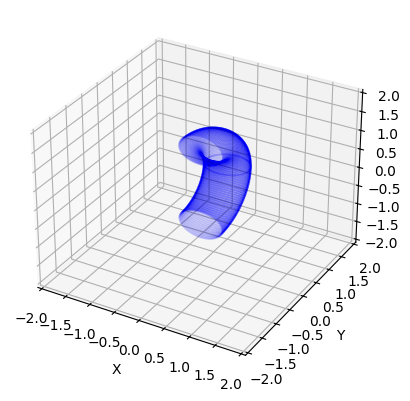

In [3]:
path = '../velocity_results/alpha04_2D_'


geometry_2D = np.load(path + 'geometry.npy')

x_core_2d, y_core_2d, _, x_ring_2d, y_ring_2d = geometry_2D.T

theta = np.linspace(0, 2*np.pi, 181)
Theta = np.repeat(theta[np.newaxis, :], x_core_2d.size, axis=0)
Z_core_2d = y_core_2d[:, np.newaxis] * np.sin(Theta)
Y_core_2d = y_core_2d[:, np.newaxis] * np.cos(Theta)
X_core_2d = np.repeat(x_core_2d[:, np.newaxis], len(theta), axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
k_theta = len(theta) // 4
cross_section_x = np.concatenate((X_core_2d[:, -k_theta:], X_core_2d[:, :k_theta]))
cross_section_y = np.concatenate((Y_core_2d[:, -k_theta:], Y_core_2d[:, :k_theta]))
cross_section_z = np.concatenate((Z_core_2d[:, -k_theta:], Z_core_2d[:, :k_theta]))

ax.scatter(cross_section_x, cross_section_y, cross_section_z, c='b', s=0.1, alpha=0.05)
# ax.scatter(X_core_2d, Y_core_2d, Z_core_2d, c='r', s=1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

def find_inside_points(data):
    x_2d = data[:, 1]
    # y_2d = sqrt(y_3d^2 + z_3d^2)
    y_2d = np.sqrt(data[:, 2]**2 + data[:, 3]**2)
    upper_core = Path(np.vstack([x_core_2d, y_core_2d]).T).contains_points(np.vstack([x_2d, y_2d]).T)
    return data[upper_core], data[~upper_core]



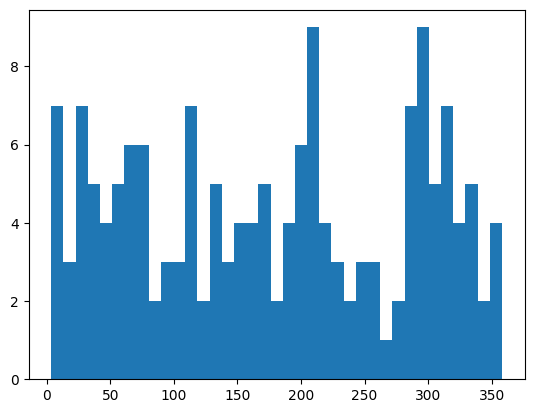

In [38]:
directory = '../influx_random_sims_3D_duo/N_realisation_4_bounce/'
files = sorted([file for file in os.listdir(directory) if file.endswith('.npy')], key=lambda x: int(re.search(r'\d+', x).group()))
dt = 0.03


for i, f in enumerate(files[:1]):
    data = np.load(directory + f)
    inside, _ = find_inside_points(data)
    x, y, z = inside[:, 1], inside[:, 2], inside[:, 3]
    theta = np.arctan2(np.abs(z), np.sqrt(x**2 + y**2)) 
    theta[(y<0) & (z>0)] = np.pi - theta[(y<0) & (z>0)]
    theta[(y<0) & (z<0)] = np.pi + theta[(y<0) & (z<0)]
    theta[(y>0) & (z<0)] = 2*np.pi - theta[(y>0) & (z<0)]

plt.hist(theta*180/np.pi, bins=37);

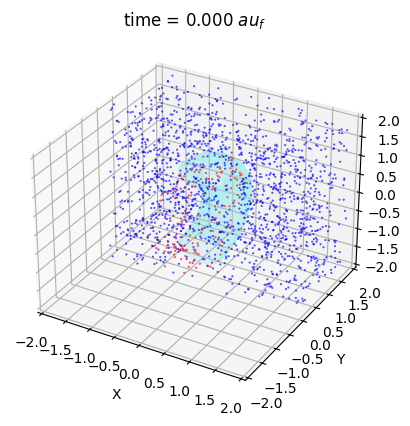

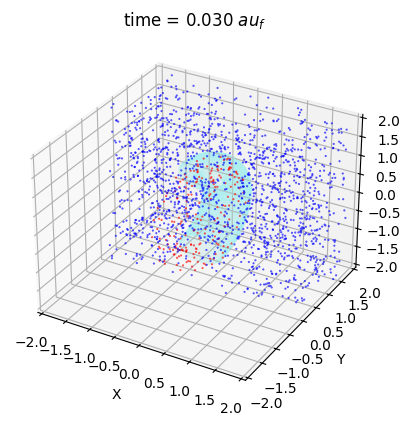

In [28]:
directory = '../influx_random_sims_3D_duo/N_realisation_4_bounce/'
files = sorted([file for file in os.listdir(directory) if file.endswith('.npy')], key=lambda x: int(re.search(r'\d+', x).group()))
dt = 0.03


for i, f in enumerate(files[:2]):
    data = np.load(directory + f)
    inside, outside = find_inside_points(data)
    outside_halfplane = outside[:, 2] > 0
    sizes_in = 1.1 * inside[:, 7]
    sizes_out = 1.1 * outside[outside_halfplane, 7]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cross_section_x, cross_section_y, cross_section_z, c=mcolors.CSS4_COLORS['paleturquoise'], s=0.1, alpha=0.05)
    ax.scatter(inside[:, 1], inside[:, 2], inside[:, 3], c='r', s=sizes_in, alpha=0.7)
    ax.scatter(outside[outside_halfplane, 1], outside[outside_halfplane, 2], outside[outside_halfplane, 3], c='b', s=sizes_out, alpha=0.7)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('time = {:.3f} $\tau_f$'.format(i*dt))